In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [19]:
auth= {
'user_name' : 'eac521',
'password' : 'dukes845'
}
#headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome','Accept' : 'text/html,application/xhtml+xml,application/xml;' 'q=0.9,image/webp,*/*;q=0.8'}
url = 'https://log.concept2.com/login'

In [24]:
req = requests.get(url,params=auth)

In [29]:
BeautifulSoup(req.text,'html.parser').find_all('a',{'href':'/log'})
log = requests.get(url+'/log')

In [30]:
log

<Response [404]>

In [5]:
requests.post('https://log.concept2.com/oauth/access_token',params=auth)

<Response [400]>

In [ ]:
requests

#### couldnt get the api to work manually extracted data

### Going through CSVs

In [74]:
import zipfile
import os

In [170]:
datad = '/Users/ericcoxon/code/lifts/erg/data/'

In [91]:
def unZip(directory):
    zips = [z for z in os.listdir(directory) if z.find('.zip')>-1]
    for z in zips:
        zipfile.ZipFile(directory+'/'+z).extractall(directory)
        os.remove(directory+'/'+z)
        print('unzipped',z,'and the zip file has been deleted')

In [111]:
files = [datad+'/'+file for file in os.listdir(datad) if file.find('.csv')>-1]

In [112]:
df = pd.DataFrame()
for file in files:
    temp = pd.read_csv(file)
    temp['rideID'] = file[file.find('result-')+7:file.find('.csv ')]
    

,Number,Time (seconds),Distance (meters),Pace (seconds),Watts,Cal/Hr,Stroke Rate,Heart Rate
0,1,3.0,14.3,196.9,46,457,57,94
1,2,5.0,27.3,156.6,91,613,65,95
2,3,6.5,37.8,144.9,115,695,69,96
3,4,8.5,52.2,139.7,128,741,71,99
4,5,10.0,63.4,137.3,135,765,73,101
...,...,...,...,...,...,...,...,...
187,188,92.3,910.5,104.1,310,1367,94,169
188,189,93.8,924.5,106.5,290,1297,92,169
189,190,95.3,937.4,109.3,268,1222,88,170
190,191,96.8,948.7,118.1,212,1031,79,170


In [114]:
df = pd.read_csv(files[1]).drop(columns='Number')

In [123]:
df.columns = [col.split('(')[0].strip().replace(' ','').replace('/','_') for col in df.columns]

In [166]:
def getSeason(year=None):
    import datetime as dt
    if year == None:
        if dt.datetime.today().month>=1 and dt.datetime.today().month<5:
            year = dt.datetime.today().year
        else:
            year = dt.datetime.today().year+1
    path = os.path.dirname(os.getcwd())+'/Data'
    season = [file for file in os.listdir(path) if file.find('season-'+str(year))>-1]
    if len(season)==1:
        return season[0]
    else:
        return season
    

In [167]:
season = getSeason()

In [172]:
seasdf = pd.read_csv(datad+season)

In [189]:
seasdf['Description']=['Zone 2' if str(cell).find('nan')>-1 else 'Zone 5' for cell in seasdf.Comments]

In [ ]:
seasdf['Time']

In [201]:
seasdf.columns

Index(['Log ID', 'Date', 'Description', 'Work Time (Formatted)',
       'Work Time (Seconds)', 'Rest Time (Formatted)', 'Rest Time (Seconds)',
       'Work Distance', 'Rest Distance', 'Stroke Rate/Cadence', 'Stroke Count',
       'Pace', 'Avg Watts', 'Cal/Hour', 'Total Cal', 'Avg Heart Rate',
       'Drag Factor', 'Age', 'Weight', 'Type', 'Ranked', 'Comments'],
      dtype='object')

In [217]:
seasdf['time'] = seasdf.Date.str[10:]
seasdf['Date'] = seasdf.Date.str[:10]

In [232]:
z2 = seasdf.loc[seasdf.Description=='Zone 2'].iloc[:,:-5].reset_index()

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

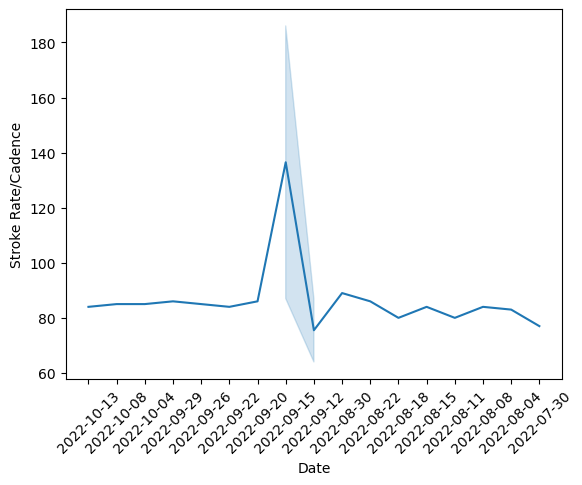

In [221]:
sns.lineplot(data=z2,x='Date',y='Stroke Rate/Cadence')
plt.xticks(rotation=45)
plt.show()

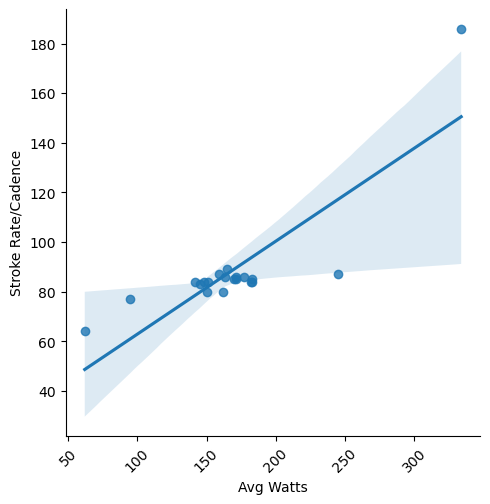

In [238]:

#sns.lineplot(data=z2.sort_values(by='Date'),x='Date',y='Avg Watts')
sns.lmplot(data=z2.sort_values(by='Date'),x='Avg Watts',y='Stroke Rate/Cadence')
plt.xticks(rotation=45)
plt.show()